In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading dataset fashion_mnist
(X_train_full, y_train_full), (X_test,
                               y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# Scale input features to 0-1 range
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[:5000] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[:5000]
X_test = X_test / 255.0

In [4]:
# Creating labels names
class_names = ["T-shirt/top", "Trousers", "Pullover", "Dress",
               "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [5]:
# Creating the model using the Sequential API
# Neural Network with 2 hidden layers
# Single stacl of layers connected sequentially
model = keras.Sequential([
    # Flatten --> convert each input image into a 1D array
    keras.layers.Flatten(input_shape=[28, 28]),
    # Dense with 300-100 neurons ReLU activation function
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    # Dense with 10 neurons Softmax activation function
    keras.layers.Dense(10, activation="softmax")]
)


In [6]:
# Getting sumary of the model
summary = model.summary()
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:

# sparse_categorical_crossentropy --> we are having multiple labels [0 .. 9]
# sgd --> we will train the model using Stochastic Gradient Descent (BackPropagation Algorithm) : Learning rate =0.01
# measuring accuracy
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]
              )

In [8]:
# Training and evaluating

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))


Epoch 1/30
157/157 [==============================] - 1s 5ms/step - loss: 1.8058 - accuracy: 0.4569 - val_loss: 1.0442 - val_accuracy: 0.6722
Epoch 2/30
157/157 [==============================] - 0s 2ms/step - loss: 0.9326 - accuracy: 0.7090 - val_loss: 0.8028 - val_accuracy: 0.7326
Epoch 3/30
157/157 [==============================] - 0s 2ms/step - loss: 0.7447 - accuracy: 0.7479 - val_loss: 0.6752 - val_accuracy: 0.7806
Epoch 4/30
157/157 [==============================] - 0s 3ms/step - loss: 0.6618 - accuracy: 0.7849 - val_loss: 0.6201 - val_accuracy: 0.7862
Epoch 5/30
157/157 [==============================] - 0s 2ms/step - loss: 0.6030 - accuracy: 0.7972 - val_loss: 0.5975 - val_accuracy: 0.7984
Epoch 6/30
157/157 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.8112 - val_loss: 0.5815 - val_accuracy: 0.8030
Epoch 7/30
157/157 [==============================] - 0s 2ms/step - loss: 0.5391 - accuracy: 0.8211 - val_loss: 0.7028 - val_accuracy: 0.7584
Epoch 

history:  <tensorflow.python.keras.callbacks.History object at 0x7fd29b9ccb80>


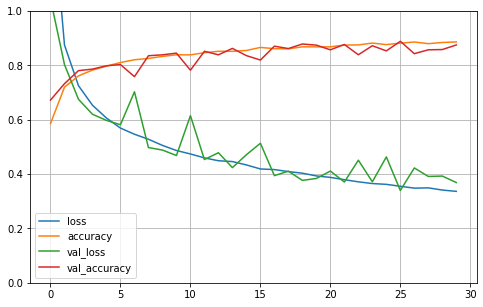

In [9]:
print("history: ", history)
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [11]:

model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

313/313 [==============================] - 0s 588us/step - loss: 0.5463 - accuracy: 0.8095


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.18, 0.01, 0.79],
       [0.  , 0.  , 0.91, 0.  , 0.03, 0.  , 0.05, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)